#### Install required packages

In [8]:
# requiered packages
!pip3 install -r requirements.txt

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Using cached geocoder-1.38.1-py2.py3-none-any.whl (98 kB)
     |████████████████████████████████| 112 kB 2.4 MB/s 
     |████████████████████████████████| 219 kB 6.1 MB/s 
     |████████████████████████████████| 60 kB 315 kB/s 
     |████████████████████████████████| 1.9 MB 7.5 MB/s 
  Using cached descartes-1.1.0-py3-none-any.whl (5.8 kB)
     |████████████████████████████████| 410 kB 7.8 MB/s 
  Using cached ratelim-0.1.6-py2.py3-none-any.whl (4.0 kB)
  Using cached geographiclib-1.50-py3-none-any.whl (38 kB)
     |████████████████████████████████| 244 kB 5.9 MB/s 
     |████████████████████████████████| 4.3 MB 6.9 MB/s 
  Created wheel for mplleaflet: filename=mplleaflet-0.0.5-py3-none-any.whl size=28554 sha256=fcd69fd7c80b650a1435f56767497a19c670d456db6468107812f8d288404639
  Stored in directory: /home/bruno/.cache/pip/wheels/d4/a9/cf/8c4753b208759e9509ade040a94c3d4271f1756f529c575dc8
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-an

In [1]:
%matplotlib inline

# general
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# accessibility analysis
import time
from pandana.loaders import osm
from pandana.loaders import pandash5

#Hide warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot preference
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

print('Libraries imported.')

Libraries imported.


### 3. Cleaning and Pre-processing

In [2]:
#!pwd to check the working directory
raw_df = pd.read_csv('../data/listings.csv.gz', compression='gzip')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 26615 Airbnb listings


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210222161029,2021-02-23,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.96592,-43.17896,Entire condominium,Entire home/apt,5,NaN,1 bath,2.0,2.0,"[""Air conditioning"", ""Essentials"", ""Luggage dr...",$221.00,5,180,5.0,5.0,1125.0,1125.0,5.0,1125.0,NaN,t,0,8,38,304,2021-02-23,260,12,2,2010-07-15,2021-02-08,94.0,9.0,9.0,10.0,10.0,10.0,9.0,NaN,t,1,1,0,0,2.01
1,24480,https://www.airbnb.com/rooms/24480,20210222161029,2021-02-23,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,Goya,2010-03-26,"Rio de Janeiro, Rio de Janeiro, Brazil",Welcome to Rio!\r\nI am a filmmaker and a tea...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/6b404...,https://a0.muscache.com/im/pictures/user/6b404...,Ipanema,0.0,0.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Rio de Janeiro, Brazil",Ipanema,NaN,-22.98570,-43.20193,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Extra pillows and blankets"", ""Air conditioni...",$307.00,3,90,3.0,3.0,90.0,90.0,3.0,90.0,NaN,t,0,0,0,10,2021-02-23,85,0,0,2010-09-26,2018-02-14,95.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,f,1,1,0,0,0.67
2,25026,https://www.airbnb.com/rooms/25026,20210222161029,2021-02-23,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,Ghizlane,2012-10-03,"Rio de Janeiro, Rio de Janeiro, Brazil","French girl ""lost in Brazilian translation"" si...",within a few hours,97%,78%,f,https://a0.muscache.com/im/pictures/user/fffed...,https://a0.muscache.com/im/pictures/user/fffed...,Ipanema,11.0,11.0,"['phone', 'reviews', 'jumio', 'offline_governm...",t,f,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.97712,-43.19045,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,2.0,"[""Elevator"", ""Dedicated workspace"", ""Kitche

#### Droping initial columns


O Processamento de Linguagem Natural não será usado na criação deste modelo. Portanto, as colunas de texto livre serão descartadas por enquanto, assim como outras colunas que não são úteis para prever o preço (por exemplo, url, nome do host e outros recursos relacionados ao host que não estão relacionados à propriedade).

In [4]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)

Colunas com várias entradas `NULL` também são eliminadas.

In [5]:
df.isna().sum()

id                                                  0
host_since                                         24
host_response_time                               8016
host_response_rate                               8016
host_acceptance_rate                             9541
host_is_superhost                                  24
host_listings_count                                24
host_total_listings_count                          24
host_has_profile_pic                               24
host_identity_verified                             24
neighbourhood                                   12301
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    26615
latitude                                            0
longitude                                           0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                   

In [6]:
df.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'bathrooms', 
         'calendar_updated', 'license'], axis=1, inplace=True)

df.set_index('id', inplace=True) # ID as index

#### Descrição das variáveis:


- `host_since` - data em que o anfitrião entrou pela primeira vez no Airbnb

- `host_response_time` - tempo médio que o host leva para responder às mensagens

- `host_response_rate` - proporção de mensagens às quais o host responde

- `host_acceptance_rate` - proporção da aceitação do host

- `host_is_superhost` - se o host é ou não um superhost, o que é uma marca de qualidade para os hosts mais bem avaliados e experientes, e pode aumentar sua classificação de pesquisa no Airbnb

- `host_listings_count` - quantas listagens o host tem no total

- `host_total_listings_count` - quantas listagens o host tem no total

- `host_has_profile_pic` - se o host tem ou não foto de perfil

- `host_identity_verified` - se o host foi ou não verificado com id

- `neighbourhood` - bairro em que a propriedade esta (não limpo)

- `neighbourhood_cleansed` - o bairro de Edimburgo em que a propriedade está

- `latitude` e `longitude` - cordenadas da propriedade

- `property_type` - tipo de propriedade, por exemplo casa ou apartamento

- `room_type` - tipo de listagem, por exemplo casa inteira, quarto privado ou quarto compartilhado

- `accommodates` - quantas pessoas a propriedade acomoda

- `bathrooms` - número de banheiros

- `bathrooms_text` - número de banheiros (variáveis em texto (sujo))

- `bedrooms` - número de quartos

- `beds` - número de camas

- `amenities` - lista de facilidades

- `price` - preço anunciado noturno (a variável de destino)

- `minimum_nights` - a duração mínima da estadia

- `maximum_nights` - a duração máxima da estadia

- `minimun_minimum_nights` - mínima duração mínima da estadia

- `maxmum_minimum_nights` - máxima duração mínima da estadia

- `minimun_maximum_nights` - mínima duração máxima da estadia

- `maximum_maximum_nights` - máxima duração máxima da estadia

- `minimum_nights_avg_ntm` -  duração média mínima da estadia

- `maximum_nights_avg_ntm` - a duração média máxima da estadia

- `calendar_updated` - quando o host atualizou o calendário pela última vez

- `has_availability` - se o host tem disponibilidade

- `'availability_30'` - quantas noites estão disponíveis para serem reservadas nos próximos 30 dias

- `availability_60` - quantas noites estão disponíveis para reserva nos próximos 60 dias

- `availability_90` - quantas noites estão disponíveis para reserva nos próximos 90 dias

- `availability_365` - quantas noites estão disponíveis para serem reservadas nos próximos 365 dias

- `number_of_reviews` - ​​o número de comentários deixados para a propriedade

- `number_of_reviews_ltm` - o número de comentários deixados sobre a propriedade nos últimos doze meses

- `number_of_reviews_l30d` - o número de comentários deixados sobre a propriedade nos últimos 30 dias

- `first_review` - a data da primeira revisão

- `last_review` - a data da revisão mais recente

- `review_scores_rating` - os hóspedes podem pontuar propriedades em geral de 1 a 5 estrelas

- `review_scores_accuracy` - os hóspedes podem pontuar a precisão da descrição de uma propriedade de 1 a 5 estrelas

- `review_scores_cleanliness` - os hóspedes podem pontuar a limpeza de uma propriedade de 1 a 5 estrelas

- `review_scores_checkin` - os hóspedes podem pontuar seu check-in de 1 a 5 estrelas

- `review_scores_communication` - os hóspedes podem pontuar a comunicação de um host de 1 a 5 estrelas

- `review_scores_location` - os hóspedes podem pontuar a localização de uma propriedade de 1 a 5 estrelas

- `review_scores_value` - os hóspedes podem pontuar o valor do dinheiro de uma reserva de 1 a 5 estrelas

- `calculated_host_listings_count` - valor contínuo, que é o número real de listagens do host - outra métrica para medir a experiência do host ou para distinguir empresas de indivíduos

- `calculated_host_listings_count_entire_homes` - valor contínuo, que é o número real de listagens do host para casas inteiras

- `calculated_host_listings_count_private_rooms` - valor contínuo, que é o número real de listagens do host para quartos privados

- `calculated_host_listings_count_shared_rooms` - valor contínuo, que é o número real de listagens do host para quartos compartilhados

- `reviews_per_month` - campo calculado do número médio de comentários deixados pelo hóspede a cada mês

host_listings_count e host_total_listings_count são iguais em todos os casos, exceto em 24. Esses casos são aqueles em que o valor é NaN. Portanto, uma dessas colunas pode ser eliminada. Outras colunas que as dividem por tipo de propriedade também serão descartadas, pois serão altamente correlacionadas (uma será o total das outras).

In [6]:
print(sum((df.host_listings_count == df.host_total_listings_count) == False))
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:5]

24


,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
895893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Rio de Janeiro, Brazil",Copacabana,-22.97526,-43.19348,Entire apartment,Entire home/apt,7,2 baths,3.0,3.0,"[""Air conditioning"", ""Essentials"", ""Hangers"", ...",$230.00,2,90,2.0,2.0,90.0,90.0,2.0,90.0,t,0,0,0,1,51,0,0,2014-07-12,2019-02-03,95.0,10.0,9.0,10.0,10.0,10.0,9.0,f,1,1,0,0,0.63
916057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maracanã,-22.91066,-43.21965,Entire house,Entire home/apt,6,NaN,3.0,1.0,"[""Long term stays allowed"", ""Wifi"", ""TV""]","$1,200.00",1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
2692189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maracanã,-22.91268,-43.21945,Entire house,Entire home/apt,8,1 bath,3.0,10.0,"[""Long term stays allowed"", ""Kitchen"", ""Wifi"",...","$4,091.00",1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,30,60,90,365,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,2,2,0,0,NaN
2703264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Rio Ipanema, Rio de Janeiro, Brazil",Ipanema,-22.98681,-43.19631,Entire apartment,Entire home/apt,4,2 baths,2.0,4.0,"[""Elevator"", ""Kitchen"", ""Hair dryer"", ""Air con...","$1,077.00",4,30,4.0,4.0,30.0,30.0,4.0,30.0,t,28,58,88,363,12,0,0,2014-06-20,2020-01-06,95.0,10.0,9.0,10.0,10.0,10.0,9.0,f,1,1,0,0,0.15
4603046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Rio de Janeiro, Brazil",Copacabana,-22.97958,-43.19041,Entire apartment,Entire home/apt,4,1 bath,2.0,4.0,"[""Elevator"", ""Kitchen"", ""Washer"", ""Air conditi...",$861.00,8,30,8.0,8.0,30.0,30.0,8.0,30.0,t,27,57,87,362,2,0,0,2015-01-04,2016-06-14,80.0,10.0,8.0,6.0,10.0,10.0,8.0,f,1,1,0,0,0.03


In [8]:
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 
         'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 
         'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

Existem várias colunas para a localização da propriedade, incluindo uma tentativa do site que originalmente extraiu os dados de limpar as localizações do bairro. Algumas dessas colunas podem ser eliminadas. Como todas as listagens estão no Rio, as colunas relacionadas à cidade e ao país podem ser descartadas. Uma coluna para a área será mantida, `neighboorhood_cleansed`.

In [7]:
df.drop(['latitude', 'longitude','neighbourhood'], axis=1, inplace=True)

Existem várias colunas para estadias noturnas mínimas e máximas, mas as duas principais serão usadas, pois há poucas diferenças entre elas, por exemplo, `minimum_nights` e ` minimum_minimum_nights`. O último presumivelmente se refere ao fato de que as estadias mínimas / máximas noturnas podem variar ao longo do ano. Em vez disso, serão usados os valores padrão (ou seja, aplicados com mais frequência) mínimo / máximo por noite.

In [9]:
sum((df.minimum_nights == df.minimum_minimum_nights) == False)

1333

In [10]:
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 
         'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

Extraindo a quantidade de banheiros da coluna `bathrooms_text` devido a variável `bathrooms` estar totalmente nula.

In [12]:
df['bathrooms_text'].value_counts()

1 bath               10648
2 baths               5364
1 shared bath         2317
1 private bath        1680
3 baths               1554
1.5 baths             1336
2.5 baths              961
2 shared baths         506
3.5 baths              406
1.5 shared baths       402
4 baths                361
4.5 baths              172
5 baths                137
3 shared baths          87
6 baths                 87
2.5 shared baths        79
5.5 baths               76
7 baths                 59
0 shared baths          41
8 baths                 40
6.5 baths               40
0 baths                 37
4 shared baths          27
3.5 shared baths        23
5 shared baths          16
7.5 baths               16
Shared half-bath        13
Half-bath                8
6 shared baths           6
11 baths                 5
7 shared baths           4
Private half-bath        4
4.5 shared baths         4
8.5 baths                3
15 baths                 2
9 baths                  2
6.5 shared baths         2
1

In [14]:
df.loc[df['bathrooms_text'].isin(['Shared half-bath', 'Half-bath', 'Private half-bath']) , 'bathrooms_text'] = '0.5'
df['bathrooms_text'].value_counts()

1 bath              10648
2 baths              5364
1 shared bath        2317
1 private bath       1680
3 baths              1554
1.5 baths            1336
2.5 baths             961
2 shared baths        506
3.5 baths             406
1.5 shared baths      402
4 baths               361
4.5 baths             172
5 baths               137
3 shared baths         87
6 baths                87
2.5 shared baths       79
5.5 baths              76
7 baths                59
0 shared baths         41
8 baths                40
6.5 baths              40
0 baths                37
4 shared baths         27
0.5                    25
3.5 shared baths       23
5 shared baths         16
7.5 baths              16
6 shared baths          6
11 baths                5
4.5 shared baths        4
7 shared baths          4
8.5 baths               3
9 baths                 2
12 baths                2
10 baths                2
10.5 baths              2
15 baths                2
6.5 shared baths        2
20 shared ba

In [18]:
import re
[re.findall(r"[-+]?\d*\.\d+|\d+", x) for x in df['bathrooms_text'].value_counts().index]

[['1'],
 ['2'],
 ['1'],
 ['1'],
 ['3'],
 ['1.5'],
 ['2.5'],
 ['2'],
 ['3.5'],
 ['1.5'],
 ['4'],
 ['4.5'],
 ['5'],
 ['3'],
 ['6'],
 ['2.5'],
 ['5.5'],
 ['7'],
 ['0'],
 ['8'],
 ['6.5'],
 ['0'],
 ['4'],
 ['0.5'],
 ['3.5'],
 ['5'],
 ['7.5'],
 ['6'],
 ['11'],
 ['4.5'],
 ['7'],
 ['8.5'],
 ['9'],
 ['12'],
 ['10'],
 ['10.5'],
 ['15'],
 ['6.5'],
 ['20'],
 ['15.5'],
 ['13'],
 ['8.5'],
 ['5.5'],
 ['18'],
 ['9'],
 ['8'],
 ['20'],
 ['11.5'],
 ['12.5'],
 ['9.5']]

In [20]:
for x in df['bathrooms_text'].value_counts().index:
    df.loc[df['bathrooms_text']==x, 'bathrooms'] = float(re.findall(r"[-+]?\d*\.\d+|\d+", x)[0])
df['bathrooms'].value_counts()

1.0     14645
2.0      5870
1.5      1738
3.0      1641
2.5      1040
3.5       429
4.0       388
4.5       176
5.0       153
6.0        93
0.0        78
5.5        77
7.0        63
6.5        42
8.0        41
0.5        25
7.5        16
11.0        5
8.5         4
9.0         3
12.0        2
10.0        2
20.0        2
10.5        2
15.0        2
12.5        1
18.0        1
9.5         1
15.5        1
13.0        1
11.5        1
Name: bathrooms, dtype: int64

Verificar se os recursos booleanos e categóricos contêm um número suficiente de instâncias em cada categoria para serem úteis:

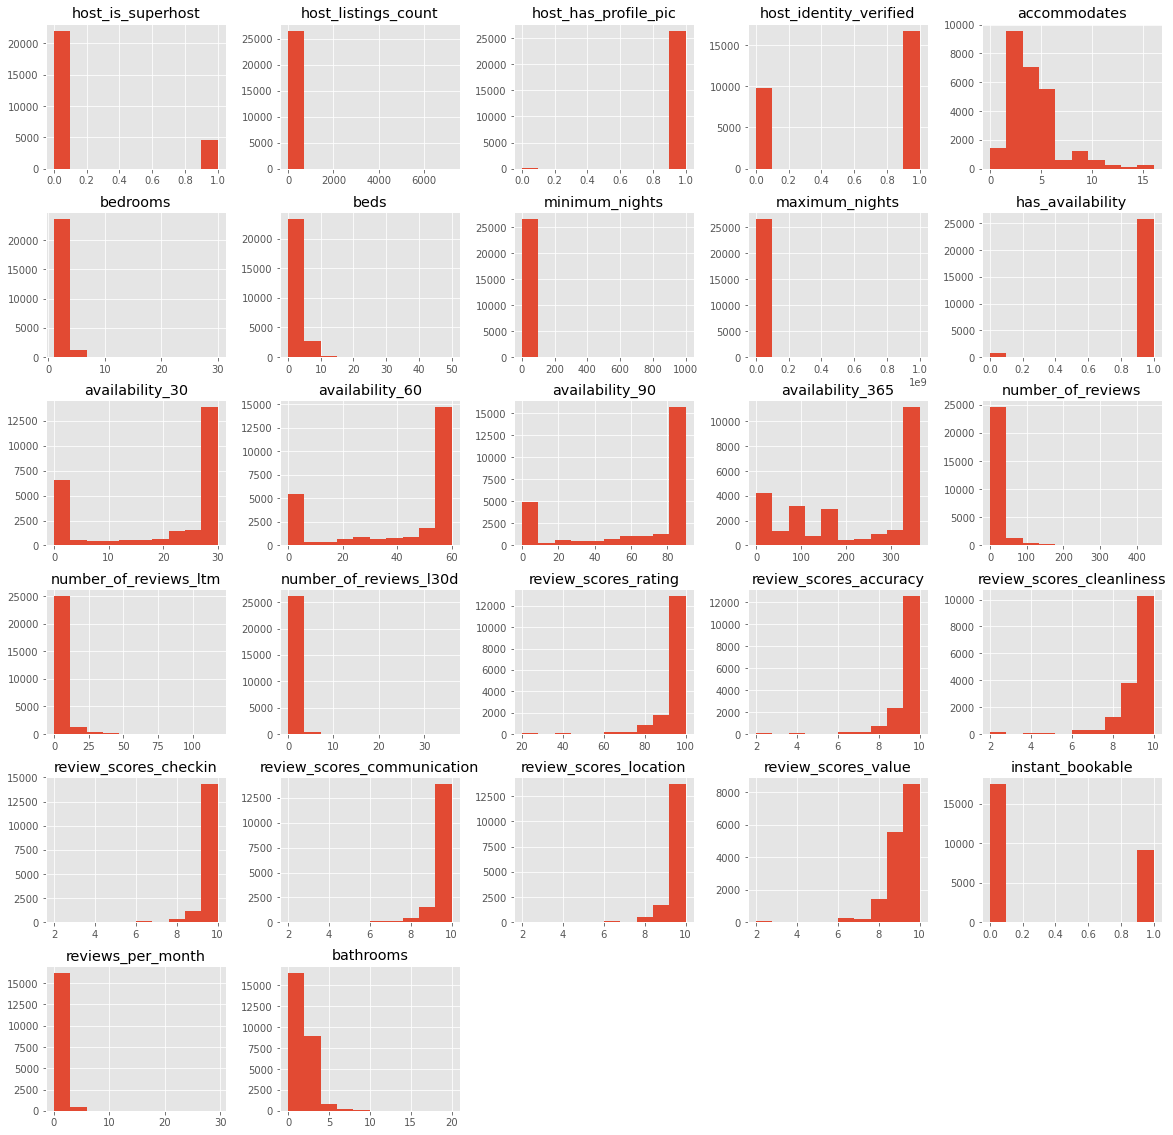

In [21]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

Do exposto, pode-se ver que algumas colunas contêm apenas uma categoria e podem ser descartadas:

In [12]:
df.drop(['has_availability', 'host_has_profile_pic'], axis=1, inplace=True)

#### Cleaning individual columns


##### `host_since`

Esta é uma coluna de data e hora e será convertida em uma medida do número de dias que um host permaneceu na plataforma, medido a partir da data em que os dados foram coletados (22 de fevereiro de 2021). A coluna original será deixada inicialmente para o EDA e eliminada posteriormente.

In [22]:
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (pd.datetime(2021, 2, 22) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 1835.0
Median days as host: 1825.0


##### `host_response_time`

Cerca de um terço das linhas não tem um valor para `host_response_time`, e a maioria deles ainda não foi revisada. Portanto, esta seção do conjunto de dados consiste principalmente em propriedades que ainda não tiveram uma estadia concluída (provavelmente propriedades que ainda não tiveram uma reserva, embora também possam incluir propriedades que têm uma reserva atualmente em curso). Embora esta seja uma proporção considerável do conjunto de dados, essas listagens serão mantidas nos dados porque ainda são propriedades legítimas com preços anunciados e ainda fazem parte do mercado comparativo ao considerar o preço pelo qual anunciar sua listagem do Airbnb. No entanto, se o conjunto de dados em uso tivesse como meta o preço médio real pago, seria necessário descartar essas linhas porque elas não teriam um valor, visto que ainda não foram reservadas.

É importante notar, entretanto, que esse grupo de listagens provavelmente também contém um grande número de listagens 'inativas'. Estas são propriedades que foram especulativamente listadas no Airbnb, mas têm seus calendários fechados (portanto, nenhuma estadia pode ser reservada), ou têm preços notavelmente mais altos do que outras propriedades em sua área.
Como `host_response_time` é desconhecido para muitas listagens, ele será mantido como sua própria categoria,` 'unknown'`.

In [23]:
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

# Number of rows without a value for host_response_time which have also not yet had a review
len(df[df.loc[ :,['host_response_time', 'first_review'] ].isnull().sum(axis=1) == 2])

Null values: 8016
Proportion: 30.1%


4841

In [24]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)*100

within an hour        33.034003
unknown               30.118354
within a few hours    16.028555
within a day          11.888033
a few days or more     8.931054
Name: host_response_time, dtype: float64

##### `host_response_rate`

Uma história semelhante é verdadeira para * host_response_rate *, com cerca de um terço dos valores sendo nulos. Isso também será mantido como sua própria categoria, após agrupar outros valores em grupos significativos (ou seja, transformar isso em uma característica categórica, em vez de numérica). Como cerca de 60% dos hosts respondem 100% do tempo, isso será mantido como sua própria categoria e outros valores serão agrupados em caixas.

In [25]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 8016
Proportion: 30.1%


In [26]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 83.0
Median host response rate: 100.0
Proportion of 100% host response rates: 59.1%


In [27]:
# Bin into four categories
df.host_response_rate = pd.cut(df.host_response_rate, 
                               bins=[0, 50, 90, 99, 100], 
                               labels=['0-49%', '50-89%', '90-99%', '100%'], 
                               include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       10986
unknown     8016
50-89%      3010
0-49%       2839
90-99%      1764
Name: host_response_rate, dtype: int64

##### `host_is_superhost`

Existem 24 linhas sem valores para cada um dos cinco diferentes recursos relacionados ao host. Essas linhas serão eliminadas.

host_is_superhost                                  24

host_listings_count                                24

host_total_listings_count                          24 (já deletada)

host_has_profile_pic                               24

host_identity_verified                             24 

In [29]:
# Number of rows without a value for multiple host-related columns
len(df[df.loc[ :,['host_is_superhost', 'host_listings_count', 
                   'host_has_profile_pic', 'host_identity_verified'] ].isnull().sum(axis=1) == 4])

24

In [30]:
df.dropna(subset=['host_since'], inplace=True)

##### `property_type`

É necessária alguma limpeza dos tipos de propriedade, pois há um grande número de categorias com apenas algumas listagens. Serão utilizadas as categorias `Apartment`, `House`, `Room` e `Other`, já que a maioria das propriedades pode ser classificada como apartamento, casa ou quarto.

In [31]:
df.property_type.value_counts()

Entire apartment                      15337
Private room in apartment              4147
Entire condominium                     1260
Private room in house                  1234
Entire house                           1139
Entire serviced apartment               597
Entire loft                             546
Private room in condominium             459
Shared room in apartment                269
Shared room in house                    192
Private room in bed and breakfast       151
Private room in guest suite             136
Room in hotel                           100
Room in aparthotel                       75
Entire villa                             71
Entire guesthouse                        64
Entire guest suite                       63
Private room in serviced apartment       59
Private room in guesthouse               50
Shared room in hostel                    47
Private room in villa                    43
Room in boutique hotel                   40
Private room in loft            

In [32]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Entire apartment':'Apartment',
    'Private room in apartment':'Room',
    'Entire condominium':'Apartment',
    'Private room in house':'Room',
    'Private room in condominium':'Room',
    'Shared room in apartment':'Room',
    'Shared room in house':'Room',
    'Private room in bed and breakfast':'Room',
    'Private room in guest suite':'Room',
    'Room in hotel':'Room',
    'Room in aparthotel':'Room',
    'Entire guest suite':'Room',
    'Private room in serviced apartment':'Room',
    'Private room in guesthouse':'Room',
    'Shared room in hostel':'Room',
    'Private room in villa':'Room',
    'Room in boutique hotel':'Room',
    'Private room in loft':'Room',
    'Private room in hostel':'Room',
    'Private room in townhouse':'Room',
    'Room in serviced apartment':'Room',
    'Shared room in condominium':'Room',
    'Private room in earth house':'Room',
    'Shared room in bed and breakfast':'Room',
    'Room in hostel':'Room',
    'Shared room in guesthouse':'Room',
    'Room in bed and breakfast':'Room',
    'Private room in casa particular':'Room',
    'Shared room in guest suite':'Room',
    'Private room':'Room',
    'Shared room in loft':'Room',
    'Private room in tiny house':'Room',
    'Private room in cottage':'Room',
    'Private room in chalet':'Room',
    'Shared room in villa':'Room',
    'Private room in nature lodge':'Room',
    'Shared room in tiny house':'Room',
    'Shared room in casa particular':'Room',
    'Private room in island':'Room',
    'Private room in bungalow':'Room',
    'Shared room in earth house':'Room',
    'Shared room in boutique hotel':'Room',
    'Room in nature lodge':'Room',
    'Private room in floor':'Room',
    'Entire dorm':'Room',
    'Private room in barn':'Room',
    'Entire floor':'Apartament',
    'Private room in castle':'Room',
    'Shared room':'Room',
    'Shared room in townhouse':'Room',
    'Private room in treehouse':'Room',
    'Shared room in farm stay':'Room',
    'Private room in boat':'Room',
    'Entire home/apt':'Apartment',
    'Private room in farm stay':'Room',
    'Shared room in cottage':'Room',
    'Entire vacation home':'House',
    'Shared room in nature lodge':'Room',
    'Shared room in bungalow':'Room',
    'Private room in tent':'Room',
    'Shared room in castle':'Room',
    'Private room in cabin':'Room',
    'Entire house':'House',
    'Entire serviced apartment':'Apartment',
    'Entire loft':'Apartment',
    'Entire villa':'House',
    'Entire guesthouse':'House',
    'Tiny house':'House',
    'Entire cottage':'House',
    'Entire townhouse':'House',
    'Entire place':'House',
    'Entire chalet':'House',
    'Earth house':'House',
    'Casa particular':'House',
    'Entire cabin':'House',
    'Entire bungalow':'House',
    'Houseboat':'House',
    'Farm stay':'House',
    'Treehouse':'House',
    'Hut':'House',
    'Entire vacation home':'House',
    'Entire hostel':'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Room', 'Apartment']), 'property_type'] = 'Other'

In [33]:
df.property_type.value_counts()

Apartment    17741
Room          7420
House         1404
Other           26
Name: property_type, dtype: int64

##### `bathrooms`, `bedrooms` and `beds`

Os valores ausentes serão substituídos pela mediana (para evitar frações estranhas). 

In [34]:
for col in [ 'bedrooms', 'beds', 'bathrooms']:
    df[col].fillna(df[col].median(), inplace=True)

##### `amenities`

Facilidades é uma lista de recursos adicionais da propriedade, ou seja, se ela tem uma TV ou estacionamento. Os exemplos estão abaixo:

In [35]:
# Example of amenities listed
df.amenities[:1].values

array(['["Air conditioning", "Essentials", "Luggage dropoff allowed", "Paid parking off premises", "Hangers", "Coffee maker", "Dedicated workspace", "Private entrance", "Bed linens", "Hot water", "Hot tub", "Patio or balcony", "Long term stays allowed", "Microwave", "Refrigerator", "Building staff", "Wifi", "Iron", "Dishes and silverware", "Cooking basics", "Stove", "Hair dryer", "Cable TV", "Elevator", "Kitchen", "TV", "Oven"]'],
      dtype=object)

In [36]:
# Creating a set of all possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('[', '')
amenities_list_string = amenities_list_string.replace(']', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_list_string = amenities_list_string.replace('\\', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '02 Bocas electric stove',
 '02 bocas c/forno gas stove',
 '04 bocas c/forno gas stove',
 '1 space',
 '100 spaces',
 '14 TV',
 '17 TV with standard cable',
 '2 Burner Hot plate electric stove',
 '2 bocas electric stove',
 '2 bocas portatil electric stove',
 '2 caixas de 45w cada',
 '2 caixas sony Bluetooth sound system',
 '2 in 1. sound system with aux',
 '2 spaces',
 '2-5 years old',
 '20 HDTV with premium cable',
 '20 TV',
 '20 spaces',
 '22 HDTV with Netflix',
 '24 HDTV with Netflix',
 '25 TV with Chromecast',
 '27 HDTV with standard cable',
 '27 TV',
 '28 HDTV with Netflix',
 '28 HDTV with standard cable',
 '29 TV with standard cable',
 '30 HDTV with Amazon Prime Video',
 '30 TV with standard cable',
 '32 HDTV',
 '32 HDTV with Amazon Prime Video',
 '32 HDTV with Chromecast',
 '32 HDTV with Netflix',
 '32 HDTV with Roku',
 '32 HDTV with premium cable',
 '32 HDTV with standard cable',
 '32 TV',
 '32 TV with Netflix',
 '32 TV with premium cable',
 '32 TV with standard cable',
 '

Na lista acima, algumas comodidades são mais importantes do que outras (ou seja, uma varanda tem mais probabilidade de aumentar o preço do que um aparelho de fax), e algumas são bastante incomuns (ou seja, 'cama de perfil elétrica'). Para o propósito deste projeto, as amenidades serão extraídas com base em uma pesquisa rápida em que as amenidades são consideradas pelos hóspedes uma seleção das experiências mais importantes e pessoais. Estes serão investigados mais detalhadamente na seção EDA. Por exemplo, se quase todas as propriedades têm / não têm uma comodidade específica, esse recurso não será muito útil para ajudar a explicar as diferenças de preços.

As comodidades escolhidas são (as barras indicam categorias separadas que podem ser combinadas):

- 24-hour check-in
- Air conditioning/central air conditioning
- Amazon Echo/Apple TV/DVD player/game console/Netflix/projector and screen/smart TV (i.e. non-basic electronics)
- BBQ grill/fire pit/propane barbeque
- Balcony/patio or balcony
- Beach view/beachfront/lake access/mountain view/ski-in ski-out/waterfront (i.e. great location/views)
- Bed linens
- Breakfast
- Cable TV/TV
- Coffee maker/espresso machine
- Cooking basics
- Dishwasher/Dryer/Washer/Washer and dryer
- Elevator
- Exercise equipment/gym/private gym/shared gym
- Family/kid friendly, or anything containing 'children'
- Free parking on premises/free street parking/outdoor parking/paid parking off premises/paid parking on premises
- Garden or backyard/outdoor seating/sun loungers/terrace
- Host greets you
- Hot tub/jetted tub/private hot tub/sauna/shared hot tub/pool/private pool/shared pool
- Internet/pocket wifi/wifi
- Long term stays allowed
- Pets allowed/cat(s)/dog(s)/pets live on this property/other pet(s)
- Private entrance
- Safe/security system
- Self check-in
- Smoking allowed
- Step-free access/wheelchair accessible, or anything containing 'accessible'
- Suitable for events

In [37]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning|Central air conditioning|Air|condicionado|Conditioner|conditioner|heating'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV|Amazon Prime Video|TV|Chromecast|Netflix|Prime|premium cable|Alexa|Airport|sony|sound|Game console'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque|Barbecue|Baking sheet|'), 'bbq'] = 1
df.loc[df['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
df.loc[df['amenities'].str.contains('Beach'), 'beach'] = 1
df.loc[df['amenities'].str.contains('Bed linens|linens'), 'bed_linen'] = 1
df.loc[df['amenities'].str.contains('Breakfast|breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Coffee maker|coffee machine|coffee'), 'coffee_machine'] = 1
df.loc[df['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df.loc[df['amenities'].str.contains('Dishwasher|Dryer|dryer|Washer|refrigerator|Brastemp|Consul|CONSUL|Eletrolux|washer'), 'white_goods'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('parking'), 'parking'] = 1
df.loc[df['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
df.loc[df['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
df.loc[df['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
df.loc[df['amenities'].str.contains('Internet|Pocket wifi|Wifi|wifi|Wi-Fi'), 'internet'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
df.loc[df['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df.loc[df['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

Uma maneira de reduzir o número de recursos é remover as comodidades que adicionam relativamente pouca informação ou são relativamente inúteis na diferenciação entre diferentes listagens. Os recursos de comodidade em que a categoria verdadeira ou falsa contém menos de 10% das listagens serão removidos.

In [42]:
df.iloc[:,39:].columns

Index(['check_in_24h', 'air_conditioning', 'high_end_electronics', 'bbq',
       'balcony', 'beach', 'bed_linen', 'breakfast', 'tv', 'coffee_machine',
       'cooking_basics', 'white_goods', 'elevator', 'gym', 'child_friendly',
       'parking', 'outdoor_space', 'host_greeting', 'hot_tub_sauna_or_pool',
       'internet', 'long_term_stays', 'pets_allowed', 'private_entrance',
       'secure', 'self_check_in', 'smoking_allowed', 'accessible',
       'event_suitable'],
      dtype='object')

In [43]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,39:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,41:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['breakfast', 'child_friendly', 'outdoor_space', 'pets_allowed', 'secure', 'self_check_in', 'smoking_allowed', 'accessible', 'event_suitable']


In [45]:
df.columns[38:]

Index(['check_in_24h', 'air_conditioning', 'high_end_electronics', 'bbq',
       'balcony', 'beach', 'bed_linen', 'tv', 'coffee_machine',
       'cooking_basics', 'white_goods', 'elevator', 'gym', 'parking',
       'host_greeting', 'hot_tub_sauna_or_pool', 'internet', 'long_term_stays',
       'private_entrance'],
      dtype='object')

##### `price`

O preço será convertido em um número inteiro. Atualmente é uma string porque há um símbolo monetário.

In [46]:
df.price.str[1:-3]

id
17878         221
24480         307
25026         160
35636         273
35764         135
            ...  
48269503       94
48269534      141
48270411    2,500
48270514      160
48276004      316
Name: price, Length: 26591, dtype: object

In [47]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

##### `availability`

Existem várias medidas diferentes de disponibilidade, que serão altamente correlacionadas entre si. Apenas 2 seram mantidas, disponibilidade por 90 e 365 dias (`availability_90`, `availability_365`). 

<AxesSubplot:>

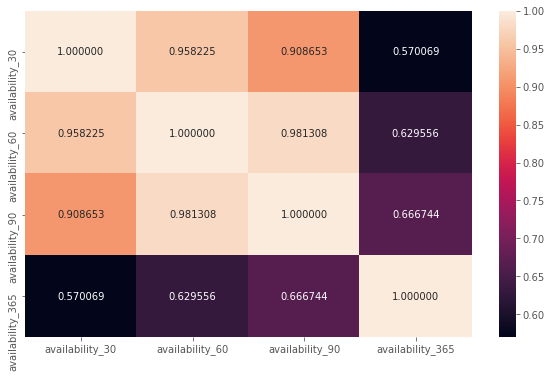

In [50]:
# calculate the correlation matrix
corr = df[['availability_30', 'availability_60', 'availability_90', 'availability_365']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True, fmt="f")

In [51]:
df.drop(['availability_30', 'availability_60'], axis=1, inplace=True)

##### `first_review` and `last_review`

Quase 20 por cento das listagens não tiveram uma avaliação escrita para elas. Essa é uma proporção muito grande do conjunto de dados para ser eliminada, e descartar as colunas perderia muitas informações úteis porque as avaliações são muito importantes nas decisões das pessoas sobre a reserva e, portanto, no preço.

Essa também é uma proporção muito grande do conjunto de dados para simplesmente substituir por valores medianos / médios, pois isso distorceria a distribuição substancialmente. Além disso, os valores ausentes aqui não são realmente valores ausentes, pois o fato de serem NaNs é significativo - isso nos diz que são listagens novas ou não reservadas anteriormente que ainda não tiveram avaliações. Para que o modelo resultante funcione capaz de prever preços para qualquer anúncio do Airbnb, incluindo novos anúncios, é realmente benéfico mantê-los. Portanto, eles serão mantidos como uma categoria desconhecida e o recurso terá que ser tratado como categórica (e, portanto, codificada em um único ponto) em vez de numérica.

In [52]:
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 37.4%
Null values in 'review_scores_rating': 39.4%


In [53]:
df.first_review = pd.to_datetime(df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (pd.datetime(2021, 2, 22) - df.first_review).astype('timedelta64[D]')

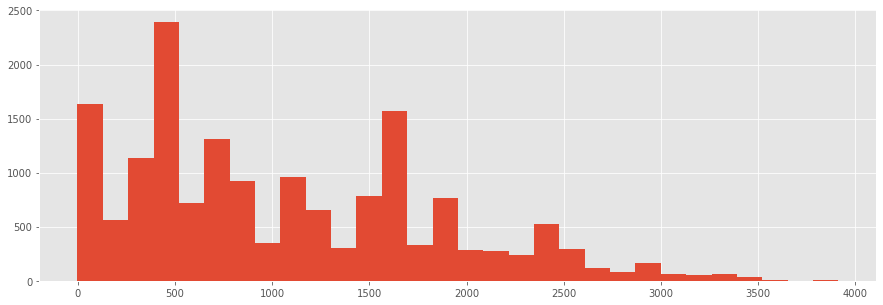

In [54]:
# Distribution of the number of days since first review
df.time_since_first_review.hist(figsize=(15,5), bins=30);

In [55]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [56]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

Same process for `last_review`

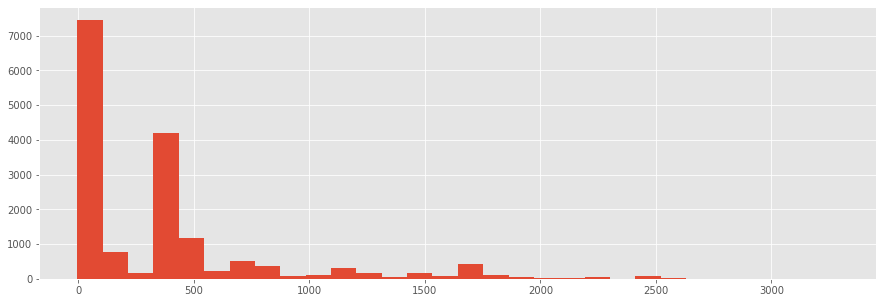

In [57]:
df.last_review = pd.to_datetime(df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (pd.datetime(2021, 2, 22) - df.last_review).astype('timedelta64[D]')

# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

In [58]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [59]:
# Dropping last_review - first_review will be kept for EDA and dropped later
df.drop('last_review', axis=1, inplace=True)

##### `review` ratings columns

Como acima, as listagens sem comentários serão mantidas e substituídas por `unknown`. Outras classificações serão agrupadas em caixas. Os histogramas abaixo foram produzidos a fim de decidir sobre variáveis úteis. A maioria das classificações é 9 ou 10 de 10, como também pode ser visto na contagem de valores abaixo. Portanto, para essas colunas, 9/10 e 10/10 serão mantidos como grupos separados e 1-8 / 10 serão agrupados (pois esta é, para os padrões do Airbnb, uma classificação 'baixa').

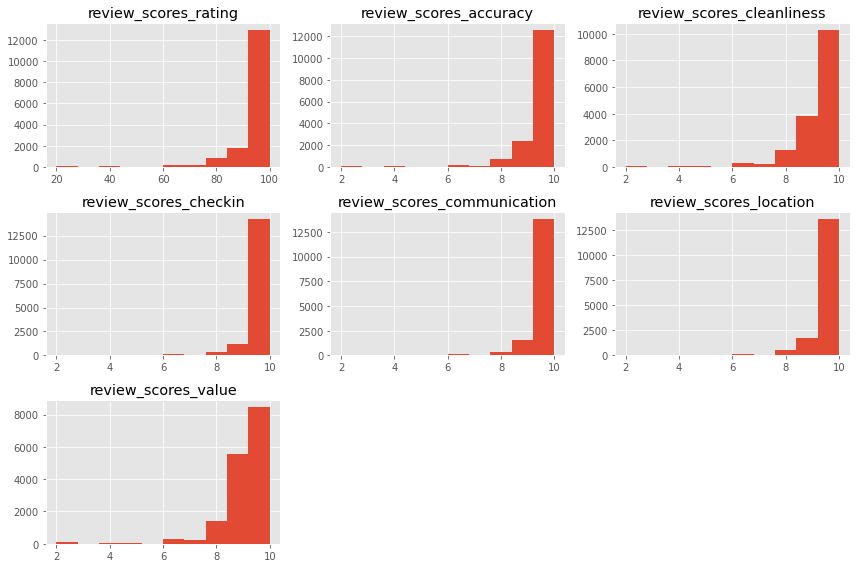

In [60]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [61]:
# Creating a list of all review columns that are scored out of 10
variables_to_plot.pop(0)

'review_scores_rating'

In [62]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [63]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

##### `number_of_reviews_ltm` and `reviews_per_month`

Estes serão altamente correlacionados com "number_of_reviews" e assim serão descartados.

<AxesSubplot:>

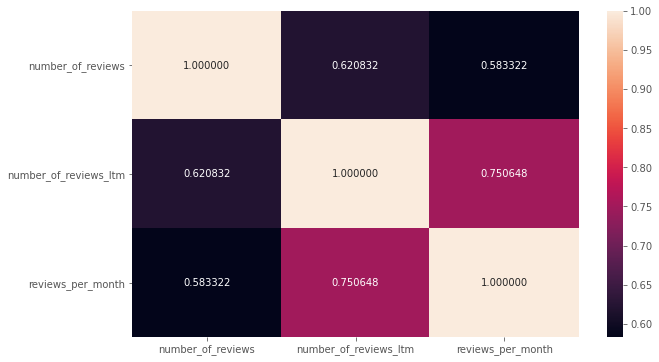

In [64]:
# calculate the correlation matrix
corr = df[['number_of_reviews', 'number_of_reviews_ltm', 'reviews_per_month']].corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,annot=True, fmt="f")

In [65]:
df.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)

In [66]:
df.head()
df.dtypes

host_since                     datetime64[ns]
host_response_time                     object
host_response_rate                     object
host_is_superhost                     float64
host_listings_count                   float64
host_has_profile_pic                  float64
host_identity_verified                float64
neighbourhood_cleansed                 object
property_type                          object
room_type                              object
accommodates                            int64
bathrooms_text                         object
bedrooms                              float64
beds                                  float64
price                                   int64
minimum_nights                          int64
maximum_nights                          int64
has_availability                        int64
availability_90                         int64
availability_365                        int64
number_of_reviews                       int64
number_of_reviews_l30d            

In [69]:
# Removing `bathrooms_text 'column forgotten
df.drop(columns='bathrooms_text', inplace=True)

In [70]:
# Save cleaned dataset
listings_cleaned = df.to_csv(r'../data/listings_cleaned.csv', index=id, header=True)